# Structure
* [1. Libraries and DataSet](#one)
* [2. Exploring the target variables](#two)
* [3. Modelling the claim Frequency](#three)
    + [3.1 Exploring the categorical variables in relation with the claim frequency ](#three-one)
    + [3.2 Exploring the continuous variables in relation with the claim frequency](#two-two)
    + [3.3 Fitting a frequency GLM](#three-three)
    + [3.4 Fitting a regularized Poisson Model ](#three-four)
    + [3.5 RMSE on test set](#three-five)
* [4. Modelling the claim Severity](#four)
* [5. Pricer with risk profiles](#five)


# 1. Libraries and Dataset <a name="one"></a>

In [691]:
import sys
import math 
import warnings; warnings.filterwarnings("ignore") #delete warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
KULbg =  "#116E8A"

In [692]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import KFold

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from feature_engine.encoding import OrdinalEncoder, OneHotEncoder

In [693]:
mtpl_origin=pd.read_csv(r"C:\Users\GeoffreyOget\Documents\GitHub\IABE-module1\assignment_data.csv")
mtpl_origin.head(25)

,AGEPH,CODPOSS,duree,lnexpo,nbrtotc,nbrtotan,chargtot,agecar,sexp,fuelc,split,usec,fleetc,sportc,coverp,powerc
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66
5,25,1030,0.295890,-1.217766,0,0.000000,0.000000,>10,Female,Petrol,Twice,Private,Yes,No,MTPL+,66-110
6,34,1040,1.000000,0.000000,0,0.000000,0.000000,>10,Female,Petrol,Monthly,Private,No,No,MTPL,<66
7,39,1040,0.076712,-2.567693,0,0.000000,0.000000,>10,Female,Petrol,Monthly,Private,No,No,MTPL,<66
8,52,1050,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,66-110
9,46,1050,0.895890,-0.109937,0,0.000000,0.000000,6-10,Female,Petrol,Monthly,Private,No,No,MTPL,66-110


I observe 16 variables in total among which  the target variables' name is  "nbrtotc" for the number of claim and "chargtot" for the claim severity. Also the exposure is under the column name "duree" and its log "lnexpo". The other variables are potentially explanatory variables. I start with a data preparation with a refining of variables names so that the explanatory variables' names are:

* sex
* age
* agecar
* fuelc
* split
* usec
* fleetc
* sportc
* coverp
* powerc

In [694]:
mtpl=mtpl_origin
mtpl.columns=mtpl_origin.columns.str.lower()
mtpl=mtpl.rename(columns={'duree':"expo","ageph":"age","nbrtotc":"nclaims","chargtot":"amount","sexp":"sex"})
mtpl.head()

,age,codposs,expo,lnexpo,nclaims,nbrtotan,amount,agecar,sex,fuelc,split,usec,fleetc,sportc,coverp,powerc
0,64,1000,1.000000,0.000000,0,0.000000,0.000000,2-5,Female,Petrol,Once,Private,No,No,MTPL+,66-110
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110
2,58,1000,0.402740,-0.909465,0,0.000000,0.000000,>10,Female,Petrol,Thrice,Private,No,No,MTPL,<66
3,37,1030,0.169863,-1.772763,0,0.000000,0.000000,2-5,Female,Petrol,Once,Professional,No,No,MTPL+++,66-110
4,29,1030,1.000000,0.000000,0,0.000000,0.000000,6-10,Female,Petrol,Once,Private,No,No,MTPL+,<66


In [695]:
print(mtpl.isnull().sum())

age         0
codposs     0
expo        0
lnexpo      0
nclaims     0
nbrtotan    0
amount      0
agecar      0
sex         0
fuelc       0
split       0
usec        0
fleetc      0
sportc      0
coverp      0
powerc      0
dtype: int64


The dataset is complete and there is no null observation. 

In [696]:
mtpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   age       163657 non-null  int64  
 1   codposs   163657 non-null  int64  
 2   expo      163657 non-null  float64
 3   lnexpo    163657 non-null  float64
 4   nclaims   163657 non-null  int64  
 5   nbrtotan  163657 non-null  float64
 6   amount    163657 non-null  float64
 7   agecar    163657 non-null  object 
 8   sex       163657 non-null  object 
 9   fuelc     163657 non-null  object 
 10  split     163657 non-null  object 
 11  usec      163657 non-null  object 
 12  fleetc    163657 non-null  object 
 13  sportc    163657 non-null  object 
 14  coverp    163657 non-null  object 
 15  powerc    163657 non-null  object 
dtypes: float64(4), int64(3), object(9)
memory usage: 20.0+ MB


In [697]:
for c in ["agecar","sex", "fuelc","split","usec","fleetc", "sportc","coverp","powerc"]:
    mtpl[c]=pd.Categorical(mtpl[c])    

In [698]:
mtpl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163657 entries, 0 to 163656
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   age       163657 non-null  int64   
 1   codposs   163657 non-null  int64   
 2   expo      163657 non-null  float64 
 3   lnexpo    163657 non-null  float64 
 4   nclaims   163657 non-null  int64   
 5   nbrtotan  163657 non-null  float64 
 6   amount    163657 non-null  float64 
 7   agecar    163657 non-null  category
 8   sex       163657 non-null  category
 9   fuelc     163657 non-null  category
 10  split     163657 non-null  category
 11  usec      163657 non-null  category
 12  fleetc    163657 non-null  category
 13  sportc    163657 non-null  category
 14  coverp    163657 non-null  category
 15  powerc    163657 non-null  category
dtypes: category(9), float64(4), int64(3)
memory usage: 10.1 MB


# 2. Exploring the target variables <a name="two"></a>

In [699]:
mtpl.nclaims.sum()/mtpl.expo.sum()

0.1393355156734497

The observed claim frequency of the whole portfolio is 13.93%


In [700]:
emp_freq = mtpl.groupby("nclaims").agg(tot_obs = ('nclaims', 'count'), tot_expo = ('expo', 'sum'))
emp_freq.reset_index(inplace=True)
emp_freq

,nclaims,tot_obs,tot_expo
0,0,145312,128595.947945
1,1,16602,15410.320548
2,2,1562,1447.301370
3,3,162,150.454795
4,4,17,14.328767
5,5,2,1.375342


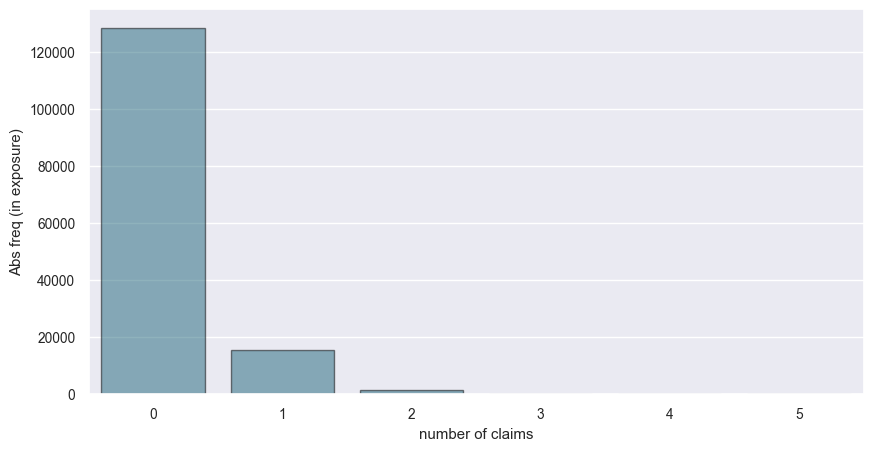

In [701]:
plt.figure(figsize = (10, 5))
sns.barplot(data = emp_freq, x = "nclaims", y = "tot_expo", color = KULbg, alpha = 0.5, edgecolor = 'black', linewidth = 1)
plt.ylabel("Abs freq (in exposure)")
plt.xlabel("number of claims")
plt.show()

From that distribution, I see that a Poisson distribution can be suitable for the claim frequency.

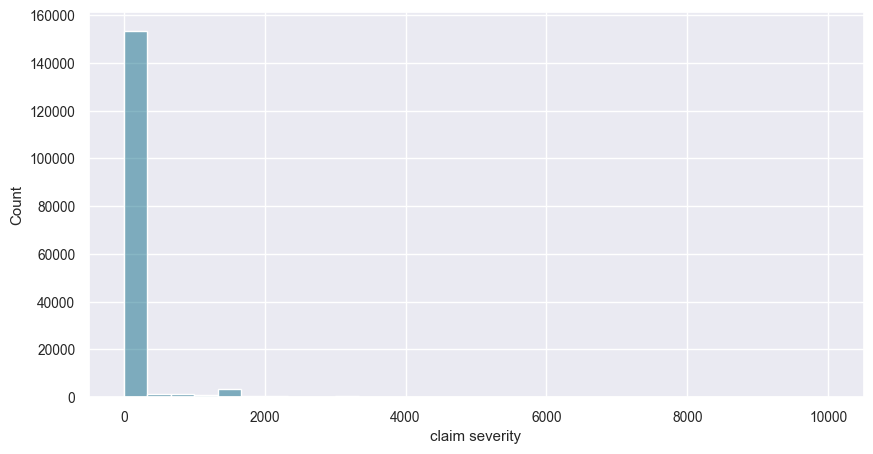

In [702]:
plt.figure(figsize=(10,5));
sns.histplot(data=mtpl, x= "amount", color=KULbg, alpha=0.5, bins=30, binrange=[0,10000])
plt.xlabel("claim severity")
plt.show() 

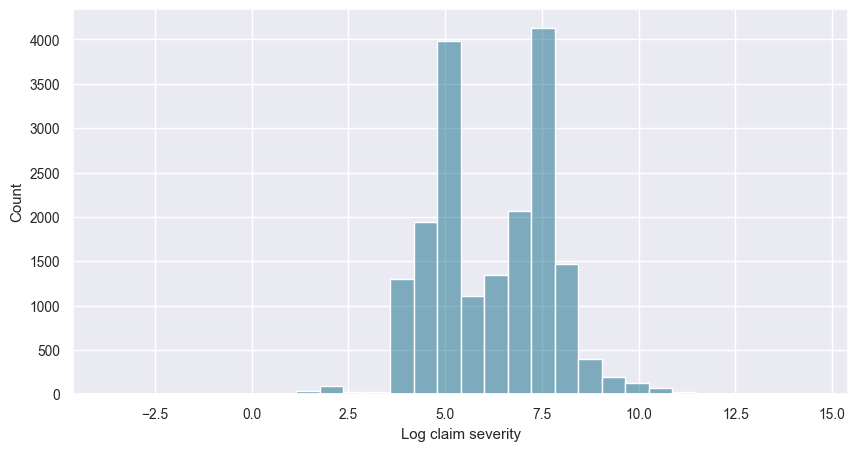

In [703]:
mtpl["log_severity"]=np.log(mtpl["amount"])
plt.figure(figsize=(10,5));
sns.histplot(data=mtpl, x= "log_severity", color=KULbg, alpha=0.5, bins=30 )
plt.xlabel("Log claim severity")
plt.show() 

From that distribution I forecast that a  lognormal distribution may be  suitable for the claim severity.

# 3. Modelling the claim Frequency <a name="three"></a>

### 3.1 Exploring the categorical variables in relation with the claim frequency <a name="three-one"></a>

<AxesSubplot: xlabel='agecar'>

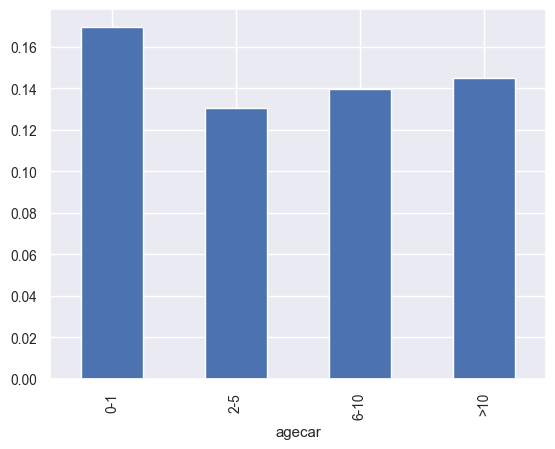

In [704]:
(mtpl.groupby("agecar")["nclaims"].sum() / mtpl.groupby("agecar")["expo"].sum()).plot(kind="bar")


<AxesSubplot: xlabel='sex'>

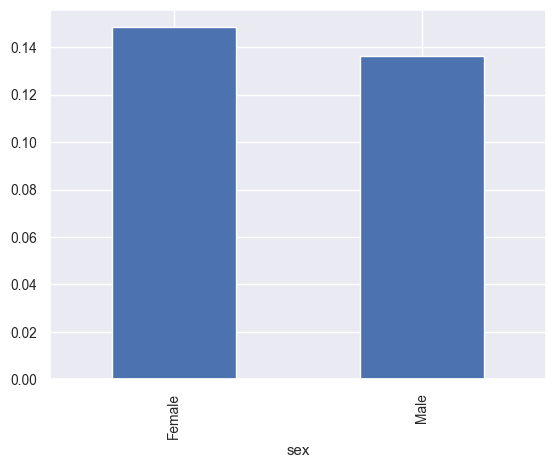

In [705]:
(mtpl.groupby("sex")["nclaims"].sum() / mtpl.groupby("sex")["expo"].sum()).plot(kind="bar")

<AxesSubplot: xlabel='fuelc'>

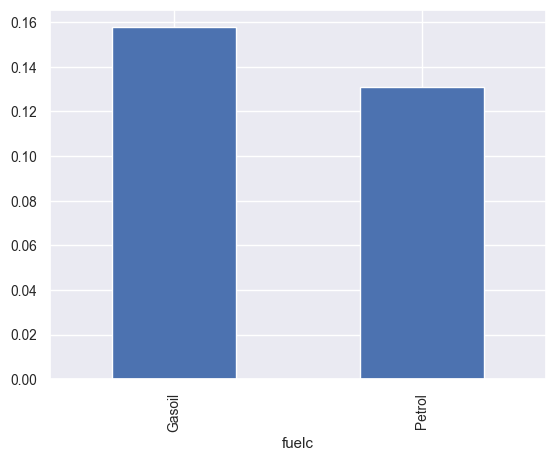

In [706]:
(mtpl.groupby("fuelc")["nclaims"].sum() / mtpl.groupby("fuelc")["expo"].sum()).plot(kind="bar")


<AxesSubplot: xlabel='split'>

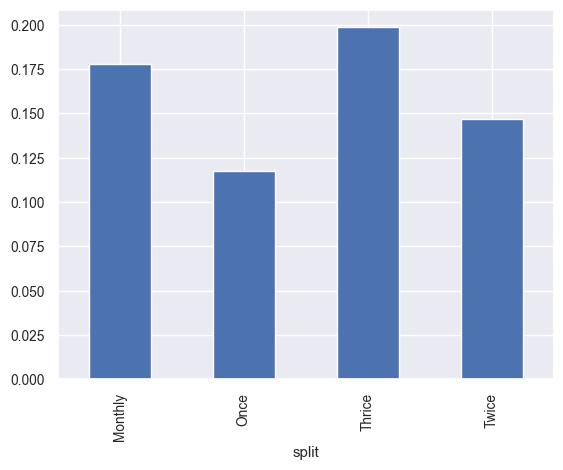

In [707]:
(mtpl.groupby("split")["nclaims"].sum() / mtpl.groupby("split")["expo"].sum()).plot(kind="bar")

<AxesSubplot: xlabel='usec'>

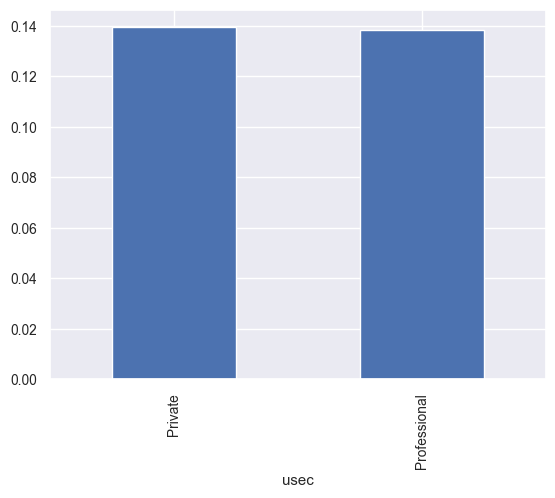

In [708]:
(mtpl.groupby("usec")["nclaims"].sum() / mtpl.groupby("usec")["expo"].sum()).plot(kind="bar")

<AxesSubplot: xlabel='fleetc'>

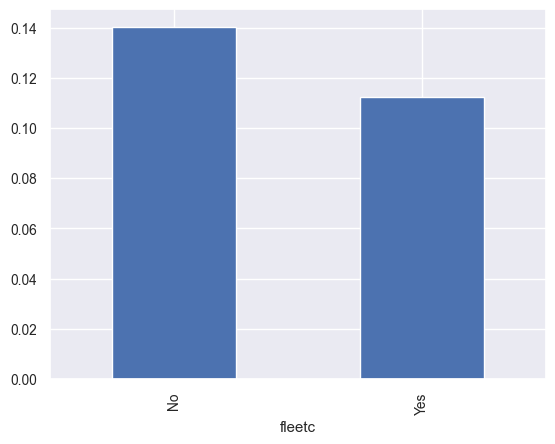

In [709]:
(mtpl.groupby("fleetc")["nclaims"].sum() / mtpl.groupby("fleetc")["expo"].sum()).plot(kind="bar")

<AxesSubplot: xlabel='sportc'>

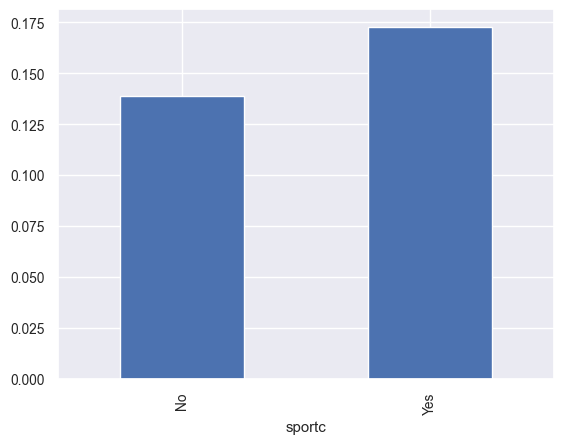

In [710]:
(mtpl.groupby("sportc")["nclaims"].sum() / mtpl.groupby("sportc")["expo"].sum()).plot(kind="bar")

<AxesSubplot: xlabel='coverp'>

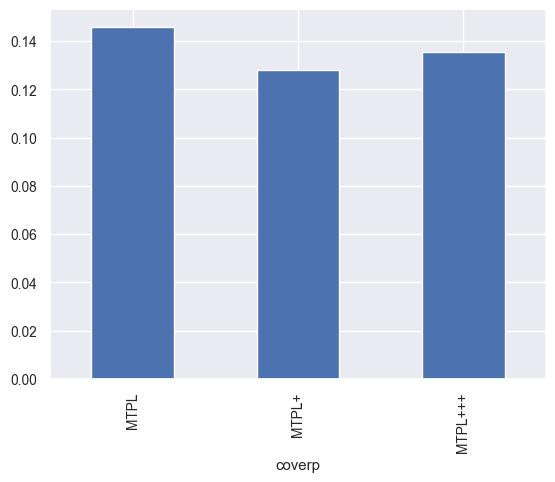

In [711]:
(mtpl.groupby("coverp")["nclaims"].sum() / mtpl.groupby("coverp")["expo"].sum()).plot(kind="bar")

<AxesSubplot: xlabel='powerc'>

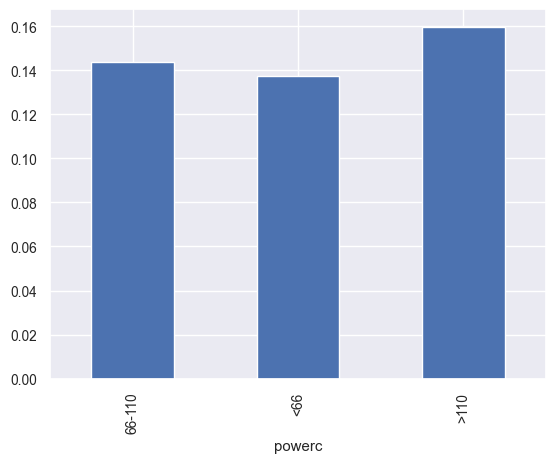

In [712]:
(mtpl.groupby("powerc")["nclaims"].sum() / mtpl.groupby("powerc")["expo"].sum()).plot(kind="bar")

It seems that most of the  categorical variables do have some degree of explanatory power except for usec. That is investigated further below.

### 3.2 Exploring the continuous variables in relation with the claim frequency <a name="three-two"></a>

In [713]:
freq_by_age = mtpl.groupby("age").agg(tot_claims = ('nclaims', 'sum'), tot_expo = ('expo', 'sum'))
freq_by_age.reset_index(inplace = True)
freq_by_age["emp_freq"] = freq_by_age["tot_claims"] / freq_by_age["tot_expo"]
freq_by_age.head()

,age,tot_claims,tot_expo,emp_freq
0,17,0,1.693151,0.000000
1,18,5,4.890411,1.022409
2,19,28,93.021918,0.301004
3,20,113,342.284932,0.330134
4,21,166,600.219178,0.276566


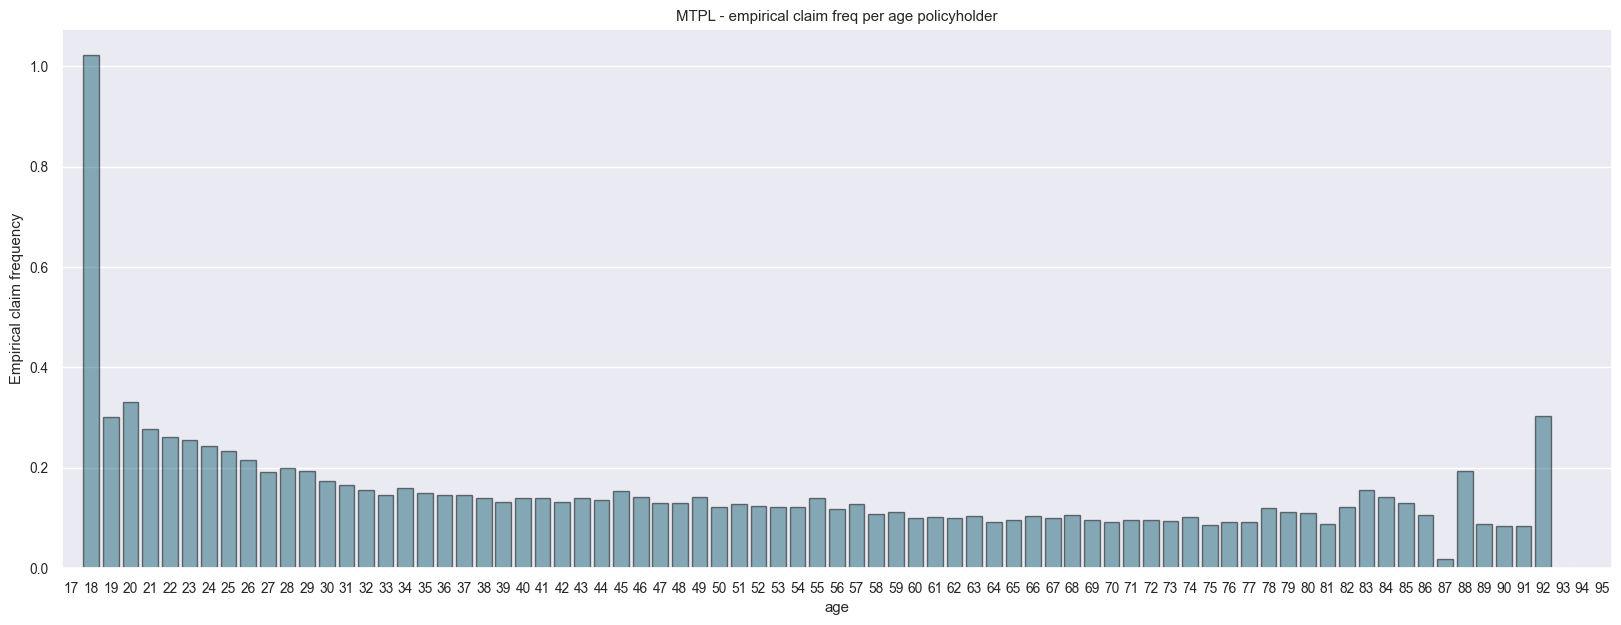

In [714]:
plt.figure(figsize = (20, 7))
sns.set(font_scale=0.9)
sns.barplot(data = freq_by_age, x = "age", y = "emp_freq", color = KULbg, alpha = 0.5, edgecolor = 'black', linewidth = 1)
plt.ylabel("Empirical claim frequency")
plt.title('MTPL - empirical claim freq per age policyholder')
plt.show()

The age variable has a significant explanatory power on the claim frequency.

### 3.3 Fitting a frequency GLM <a name="three-three"></a>

I first split the dataset into a test and train set using a stratified method.

In [715]:
mtpl_X = mtpl.drop(columns = ["nclaims"])
print(mtpl_X.shape)
mtpl_y = mtpl["nclaims"]
print(mtpl_y.shape)
print(mtpl.shape)

(163657, 16)
(163657,)
(163657, 17)


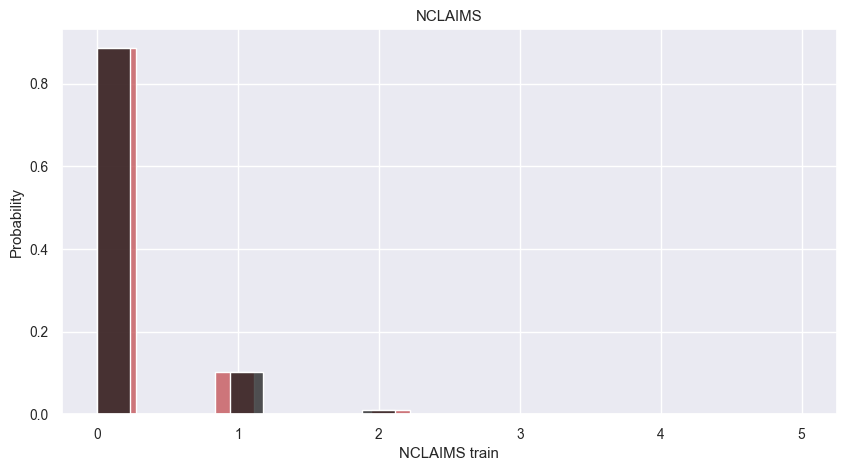

In [716]:
from sklearn.model_selection import train_test_split

np.random.seed(123)

X_train, X_test, y_train, y_test = train_test_split(mtpl_X, mtpl_y, test_size = 0.3, stratify=mtpl_y)

mtpl_train=X_train
mtpl_train["nclaims"]=y_train

mtpl_test=X_test
mtpl_test["nclaims"]=y_test

df = pd.DataFrame(y_train)
df1 = pd.DataFrame(y_test)

plot_pd = pd.concat([df,df1], ignore_index=True, axis=1)
#rename columns for x-label
plot_pd.columns = ['NCLAIMS train', 'NCLAIMS test']

#plot 

fig, axs = plt.subplots(ncols=1, figsize=(10,5));
sns.histplot(plot_pd ['NCLAIMS train'], ax = axs, color='r',stat="probability").set(title='NCLAIMS');
sns.histplot(plot_pd['NCLAIMS test'], ax = axs, color='k',stat="probability");
plt.show()


In [717]:
mtpl_train.shape
mtpl_train.head(10)

,age,codposs,expo,lnexpo,nbrtotan,amount,agecar,sex,fuelc,split,usec,fleetc,sportc,coverp,powerc,log_severity,nclaims
117829,62,4210,1.0,0.0,0.0,0.000000,2-5,Male,Gasoil,Once,Private,No,No,MTPL+++,<66,-inf,0
112147,50,9000,1.0,0.0,1.0,70.649655,0-1,Male,Gasoil,Monthly,Private,No,No,MTPL+++,<66,4.257733,1
137592,71,4280,1.0,0.0,0.0,0.000000,6-10,Male,Petrol,Twice,Private,No,No,MTPL+,<66,-inf,0
40087,40,8500,1.0,0.0,0.0,0.000000,>10,Female,Gasoil,Twice,Private,No,No,MTPL,<66,-inf,0
117624,53,3190,1.0,0.0,0.0,0.000000,6-10,Male,Gasoil,Once,Private,No,No,MTPL,<66,-inf,0
149404,49,6000,1.0,0.0,1.0,1428.412068,6-10,Male,Petrol,Twice,Private,No,No,MTPL,<66,7.264319,1
40677,27,9850,1.0,0.0,1.0,3166.889358,2-5,Female,Gasoil,Twice,Private,No,No,MTPL,<66,8.060505,1
121831,49,1800,1.0,0.0,0.0,0.000000,>10,Male,Petrol,Once,Private,No,No,MTPL,<66,-inf,0
149180,73,1080,1.0,0.0,0.0,0.000000,6-10,Male,Petrol,Twice,Private,No,No,MTPL+,<66,-inf,0
77661,25,9160,1.0,0.0,1.0,67.501407,6-10,Male,Petrol,Once,Private,No,No,MTPL,<66,4.212148,1


The variable "usec" seems not to have any predictive power in the exploratory phase. Let's consider it separately:

In [718]:
freq_usec= smf.glm(formula='nclaims ~ usec',
                       data= mtpl_train, exposure = mtpl_train.expo,
                       family = sm.families.Poisson(link=sm.families.links.log())).fit()
print(freq_usec.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               114559
Model:                            GLM   Df Residuals:                   114557
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -44800.
Date:                Fri, 03 Feb 2023   Deviance:                       63117.
Time:                        19:05:18   Pearson chi2:                 1.40e+05
No. Iterations:                     6   Pseudo R-squ. (CS):          4.670e-06
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -1.9690 

As anticipated, the p-value >5%, hence I remove "usec" from the explanatory variables. Let's now fit a first glm with the other explanatory variables:

In [719]:

freq_glm_0= smf.glm(formula='nclaims ~ age + sex + agecar + fuelc + split + fleetc + sportc + coverp + powerc ',
                       data= mtpl_train, exposure = mtpl_train.expo,
                       family = sm.families.Poisson(link=sm.families.links.log())).fit()
print(freq_glm_0.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               114559
Model:                            GLM   Df Residuals:                   114543
Model Family:                 Poisson   Df Model:                           15
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -44167.
Date:                Fri, 03 Feb 2023   Deviance:                       61850.
Time:                        19:05:19   Pearson chi2:                 1.35e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01100
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7208      0.05

In [720]:
freq_glm_0.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                  P>chi2  df constraint
Intercept  [[174.91337880129387]]   6.253491281287375e-40              1
sex        [[1.3416850841410657]]      0.2467370187386358              1
agecar      [[48.93903314049536]]  1.3440290629881988e-10              3
fuelc        [[64.3534749385739]]  1.0398482945675822e-15              1
split      [[308.57769114897695]]   1.384295161214357e-66              3
fleetc      [[3.517658986242289]]     0.06071815339615273              1
sportc     [[1.6120000436625812]]     0.20421088536096735              1
coverp      [[36.58755771949943]]  1.1353056209004502e-08              2
powerc     [[15.805475784155805]]  0.00036972987294606744              2
age        [[476.47615927677384]]   1.24890490018119e-105              1

It seems that sex, fleetc and sportc have a limited explanatory power, on the contrary agecar, fuelc, split, coverp, powerc and age have strong explanatory power. At this stage age is limited to one coefficient $\beta$. In order to better capture the age effect, let's bin it into several age categories:

In [721]:
age_cat_train , bins = pd.cut(mtpl_train.age, bins = 10, include_lowest = True,retbins=True)
age_cat_train


117829    (56.0, 63.8]
112147    (48.2, 56.0]
137592    (63.8, 71.6]
40087     (32.6, 40.4]
117624    (48.2, 56.0]
              ...     
79592     (32.6, 40.4]
54683     (32.6, 40.4]
37183     (79.4, 87.2]
99266     (48.2, 56.0]
78282     (40.4, 48.2]
Name: age, Length: 114559, dtype: category
Categories (10, interval[float64, right]): [(16.921, 24.8] < (24.8, 32.6] < (32.6, 40.4] < (40.4, 48.2] ... (63.8, 71.6] < (71.6, 79.4] < (79.4, 87.2] < (87.2, 95.0]]

In [722]:
age_cat_test = pd.cut(mtpl_test.age, bins = bins, include_lowest = True)
age_cat_test

102162      (48.2, 56.0]
6526        (24.8, 32.6]
33491       (32.6, 40.4]
104732      (24.8, 32.6]
158002      (32.6, 40.4]
               ...      
97549       (63.8, 71.6]
138342    (16.921, 24.8]
4964        (40.4, 48.2]
52069       (24.8, 32.6]
78867       (40.4, 48.2]
Name: age, Length: 49098, dtype: category
Categories (10, interval[float64, right]): [(16.921, 24.8] < (24.8, 32.6] < (32.6, 40.4] < (40.4, 48.2] ... (63.8, 71.6] < (71.6, 79.4] < (79.4, 87.2] < (87.2, 95.0]]

Here the binning of the training dataset is applied on the test set

In [723]:
age_cat_train= age_cat_train.rename("age_cat")
mtpl_train = pd.concat([mtpl_train, age_cat_train], axis = 1)
mtpl_train.head(5)

,age,codposs,expo,lnexpo,nbrtotan,amount,agecar,sex,fuelc,split,usec,fleetc,sportc,coverp,powerc,log_severity,nclaims,age_cat
117829,62,4210,1.0,0.0,0.0,0.000000,2-5,Male,Gasoil,Once,Private,No,No,MTPL+++,<66,-inf,0,"(56.0, 63.8]"
112147,50,9000,1.0,0.0,1.0,70.649655,0-1,Male,Gasoil,Monthly,Private,No,No,MTPL+++,<66,4.257733,1,"(48.2, 56.0]"
137592,71,4280,1.0,0.0,0.0,0.000000,6-10,Male,Petrol,Twice,Private,No,No,MTPL+,<66,-inf,0,"(63.8, 71.6]"
40087,40,8500,1.0,0.0,0.0,0.000000,>10,Female,Gasoil,Twice,Private,No,No,MTPL,<66,-inf,0,"(32.6, 40.4]"
117624,53,3190,1.0,0.0,0.0,0.000000,6-10,Male,Gasoil,Once,Private,No,No,MTPL,<66,-inf,0,"(48.2, 56.0]"


In [724]:
age_cat_test= age_cat_test.rename("age_cat")
mtpl_test = pd.concat([mtpl_test, age_cat_test], axis = 1)
mtpl_test.head(5)

,age,codposs,expo,lnexpo,nbrtotan,amount,agecar,sex,fuelc,split,usec,fleetc,sportc,coverp,powerc,log_severity,nclaims,age_cat
102162,52,5000,1.00000,0.000000,0.0,0.0,6-10,Male,Petrol,Once,Private,No,No,MTPL,<66,-inf,0,"(48.2, 56.0]"
6526,30,4520,1.00000,0.000000,0.0,0.0,>10,Female,Petrol,Monthly,Private,No,No,MTPL,<66,-inf,0,"(24.8, 32.6]"
33491,39,1730,1.00000,0.000000,0.0,0.0,2-5,Female,Petrol,Once,Private,Yes,No,MTPL+,66-110,-inf,0,"(32.6, 40.4]"
104732,25,1640,0.69589,-0.362563,0.0,0.0,6-10,Male,Petrol,Monthly,Private,No,No,MTPL,<66,-inf,0,"(24.8, 32.6]"
158002,35,4000,1.00000,0.000000,0.0,0.0,>10,Male,Gasoil,Once,Private,No,No,MTPL,<66,-inf,0,"(32.6, 40.4]"


In [725]:
freq_glm_1= smf.glm(formula='nclaims ~ age_cat + sex + agecar + fuelc + split + fleetc + sportc + coverp + powerc ',
                       data= mtpl_train, exposure = mtpl_train.expo,
                       family = sm.families.Poisson(link=sm.families.links.log())).fit()
print(freq_glm_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               114559
Model:                            GLM   Df Residuals:                   114535
Model Family:                 Poisson   Df Model:                           23
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -44095.
Date:                Fri, 03 Feb 2023   Deviance:                       61707.
Time:                        19:05:23   Pearson chi2:                 1.34e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01224
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

I observe here that all bins have p-value < 5% except for the age interval 87.2-95.0, this suggests that we should merge the categories 79.4-87.2 and 87.2-95.0 together. 

In [726]:
bins2 = np.array([16.922, 24.8  , 32.6  , 40.4  , 48.2  , 56.   , 63.8  , 71.6  ,
       79.4  , 95.   ])

In [727]:
age_cat_test2 = pd.cut(mtpl_test.age, bins = bins2, include_lowest = True)
age_cat_test2
age_cat_train2 = pd.cut(mtpl_train.age, bins = bins2, include_lowest = True)
age_cat_train2

117829    (56.0, 63.8]
112147    (48.2, 56.0]
137592    (63.8, 71.6]
40087     (32.6, 40.4]
117624    (48.2, 56.0]
              ...     
79592     (32.6, 40.4]
54683     (32.6, 40.4]
37183     (79.4, 95.0]
99266     (48.2, 56.0]
78282     (40.4, 48.2]
Name: age, Length: 114559, dtype: category
Categories (9, interval[float64, right]): [(16.921, 24.8] < (24.8, 32.6] < (32.6, 40.4] < (40.4, 48.2] ... (56.0, 63.8] < (63.8, 71.6] < (71.6, 79.4] < (79.4, 95.0]]

In [728]:
age_cat_test2= age_cat_test2.rename("age_cat2")
mtpl_test = pd.concat([mtpl_test, age_cat_test2], axis = 1)
mtpl_test.head(5)
age_cat_train2= age_cat_train2.rename("age_cat2")
mtpl_train = pd.concat([mtpl_train, age_cat_train2], axis = 1)
mtpl_train.head(5)

,age,codposs,expo,lnexpo,nbrtotan,amount,agecar,sex,fuelc,split,usec,fleetc,sportc,coverp,powerc,log_severity,nclaims,age_cat,age_cat2
117829,62,4210,1.0,0.0,0.0,0.000000,2-5,Male,Gasoil,Once,Private,No,No,MTPL+++,<66,-inf,0,"(56.0, 63.8]","(56.0, 63.8]"
112147,50,9000,1.0,0.0,1.0,70.649655,0-1,Male,Gasoil,Monthly,Private,No,No,MTPL+++,<66,4.257733,1,"(48.2, 56.0]","(48.2, 56.0]"
137592,71,4280,1.0,0.0,0.0,0.000000,6-10,Male,Petrol,Twice,Private,No,No,MTPL+,<66,-inf,0,"(63.8, 71.6]","(63.8, 71.6]"
40087,40,8500,1.0,0.0,0.0,0.000000,>10,Female,Gasoil,Twice,Private,No,No,MTPL,<66,-inf,0,"(32.6, 40.4]","(32.6, 40.4]"
117624,53,3190,1.0,0.0,0.0,0.000000,6-10,Male,Gasoil,Once,Private,No,No,MTPL,<66,-inf,0,"(48.2, 56.0]","(48.2, 56.0]"


In [729]:
freq_glm_2= smf.glm(formula='nclaims ~ age_cat2 + sex + agecar + fuelc + split + fleetc + sportc + coverp + powerc ',
                       data= mtpl_train, exposure = mtpl_train.expo,
                       family = sm.families.Poisson(link=sm.families.links.log())).fit()
print(freq_glm_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               114559
Model:                            GLM   Df Residuals:                   114536
Model Family:                 Poisson   Df Model:                           22
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -44095.
Date:                Fri, 03 Feb 2023   Deviance:                       61707.
Time:                        19:05:26   Pearson chi2:                 1.34e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01224
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [730]:
freq_glm_2.pvalues

Intercept                                           2.730319e-31
age_cat2[T.Interval(24.8, 32.6, closed='right')]    1.162577e-16
age_cat2[T.Interval(32.6, 40.4, closed='right')]    7.355208e-55
age_cat2[T.Interval(40.4, 48.2, closed='right')]    5.481276e-56
age_cat2[T.Interval(48.2, 56.0, closed='right')]    2.768215e-64
age_cat2[T.Interval(56.0, 63.8, closed='right')]    1.340831e-71
age_cat2[T.Interval(63.8, 71.6, closed='right')]    5.434548e-77
age_cat2[T.Interval(71.6, 79.4, closed='right')]    3.559799e-57
age_cat2[T.Interval(79.4, 95.0, closed='right')]    1.317851e-10
sex[T.Male]                                         1.437841e-01
agecar[T.2-5]                                       1.425994e-11
agecar[T.6-10]                                      7.724344e-07
agecar[T.>10]                                       3.053749e-06
fuelc[T.Petrol]                                     2.748331e-19
split[T.Once]                                       2.085583e-46
split[T.Thrice]          

In [731]:
freq_glm_2.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                             chi2                   P>chi2  df constraint
Intercept   [[135.3772803416921]]   2.7303191481218887e-31              1
age_cat2    [[674.6436492319656]]  2.0551481829809182e-140              8
sex         [[2.136986483985203]]      0.14378409451981813              1
agecar      [[48.15259927076506]]   1.9760570130757294e-10              3
fuelc       [[80.61094411031212]]   2.7483313465539934e-19              1
split       [[336.9116301725325]]   1.0175376362132487e-72              3
fleetc     [[3.5255674986652807]]      0.06042913469125366              1
sportc     [[0.9422382089272199]]      0.33170289556616417              1
coverp      [[32.07231720100194]]   1.0853874830333466e-07              2
powerc     [[22.675062075634674]]   1.1917161691408948e-05              2

The explanatory variables sex and sportc have a p-value >5% suggesting that they have low explanatory power and could be removed. However the interaction analysis should be considered to confirm or negate this choice. From the p-value it is suggested that  powerc 66-110 could be grouped with >110 and also that the categories of split Thrice with Twice could be merge. I choose not do this at this stage. 

### 3.4 Fitting a regularized Poisson Model <a name="three-four"></a>

Let's first dummify the categorical variables with more than 2 levels.

In [732]:
mtpl_train2=mtpl_train.copy()
mtpl_train2["coverp"]=mtpl_train2["coverp"].replace('MTPL+','MTPLp')
mtpl_train2["coverp"]=mtpl_train2["coverp"].replace('MTPL+++','MTPLppp')


In [733]:
dum = pd.get_dummies(mtpl_train2[["agecar","split","coverp","powerc","age_cat2"]] )
dum.head(10)

,agecar_0-1,agecar_2-5,agecar_6-10,agecar_>10,split_Monthly,split_Once,split_Thrice,split_Twice,coverp_MTPL,coverp_MTPLp,...,powerc_>110,"age_cat2_(16.921, 24.8]","age_cat2_(24.8, 32.6]","age_cat2_(32.6, 40.4]","age_cat2_(40.4, 48.2]","age_cat2_(48.2, 56.0]","age_cat2_(56.0, 63.8]","age_cat2_(63.8, 71.6]","age_cat2_(71.6, 79.4]","age_cat2_(79.4, 95.0]"
117829,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
112147,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
137592,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
40087,0,0,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
117624,0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
149404,0,0,1,0,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
40677,0,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
121831,0,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
149180,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
77661,0,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [734]:
dum=dum.rename(columns={"powerc_<66":"powerc_inf_66","powerc_>110":"powerc_sup_110","powerc_66-110":"powerc_66_110","agecar_0-1":"agecar_0_1","agecar_2-5":"agecar_2_5","agecar_6-10":"agecar_6_10","agecar_>10":"agecar_sup_10","age_cat2_(16.921, 24.8]":"age_cat2_16_24","age_cat2_(24.8, 32.6]":"age_cat2_24_32","age_cat2_(32.6, 40.4]":"age_cat2_32_40","age_cat2_(40.4, 48.2]":"age_cat2_40_48","age_cat2_(48.2, 56.0]":"age_cat2_48_56","age_cat2_(56.0, 63.8]":"age_cat2_56_63","age_cat2_(63.8, 71.6]":"age_cat2_63_71","age_cat2_(71.6, 79.4]":"age_cat2_71_79","age_cat2_(79.4, 95.0]":"age_cat2_79_95"})

In [735]:
mtpl_train2.head()

,age,codposs,expo,lnexpo,nbrtotan,amount,agecar,sex,fuelc,split,usec,fleetc,sportc,coverp,powerc,log_severity,nclaims,age_cat,age_cat2
117829,62,4210,1.0,0.0,0.0,0.000000,2-5,Male,Gasoil,Once,Private,No,No,MTPLppp,<66,-inf,0,"(56.0, 63.8]","(56.0, 63.8]"
112147,50,9000,1.0,0.0,1.0,70.649655,0-1,Male,Gasoil,Monthly,Private,No,No,MTPLppp,<66,4.257733,1,"(48.2, 56.0]","(48.2, 56.0]"
137592,71,4280,1.0,0.0,0.0,0.000000,6-10,Male,Petrol,Twice,Private,No,No,MTPLp,<66,-inf,0,"(63.8, 71.6]","(63.8, 71.6]"
40087,40,8500,1.0,0.0,0.0,0.000000,>10,Female,Gasoil,Twice,Private,No,No,MTPL,<66,-inf,0,"(32.6, 40.4]","(32.6, 40.4]"
117624,53,3190,1.0,0.0,0.0,0.000000,6-10,Male,Gasoil,Once,Private,No,No,MTPL,<66,-inf,0,"(48.2, 56.0]","(48.2, 56.0]"


In [736]:
mtpl_train2 = pd.concat([mtpl_train2, dum], axis = 1)
mtpl_train2.head(5)

,age,codposs,expo,lnexpo,nbrtotan,amount,agecar,sex,fuelc,split,...,powerc_sup_110,age_cat2_16_24,age_cat2_24_32,age_cat2_32_40,age_cat2_40_48,age_cat2_48_56,age_cat2_56_63,age_cat2_63_71,age_cat2_71_79,age_cat2_79_95
117829,62,4210,1.0,0.0,0.0,0.000000,2-5,Male,Gasoil,Once,...,0,0,0,0,0,0,1,0,0,0
112147,50,9000,1.0,0.0,1.0,70.649655,0-1,Male,Gasoil,Monthly,...,0,0,0,0,0,1,0,0,0,0
137592,71,4280,1.0,0.0,0.0,0.000000,6-10,Male,Petrol,Twice,...,0,0,0,0,0,0,0,1,0,0
40087,40,8500,1.0,0.0,0.0,0.000000,>10,Female,Gasoil,Twice,...,0,0,0,1,0,0,0,0,0,0
117624,53,3190,1.0,0.0,0.0,0.000000,6-10,Male,Gasoil,Once,...,0,0,0,0,0,1,0,0,0,0


In [737]:
alpha_grid = np.linspace(1e-6,0.004,15)
coef_list = []
rmse_list = []
for alpha in alpha_grid:
  print(f"Busy with alpha:{alpha}")
  glm_reg_fit = smf.glm('nclaims ~ sex + sportc + fuelc + fleetc + agecar_0_1+ agecar_2_5 + agecar_6_10 + agecar_sup_10 + split_Monthly + split_Once + split_Thrice +split_Twice +coverp_MTPL + coverp_MTPLp + coverp_MTPLppp + powerc_66_110 + powerc_inf_66 + powerc_sup_110 + age_cat2_16_24 + age_cat2_24_32 + age_cat2_32_40 + age_cat2_40_48 + age_cat2_48_56 + age_cat2_56_63 + age_cat2_63_71 + age_cat2_71_79 + age_cat2_79_95',
                        data=mtpl_train2, exposure=mtpl_train2.expo, family=sm.families.Poisson(link=sm.families.links.log())).fit_regularized(method='elastic_net', alpha = alpha, L1_wt = 1)
  coef_list.append(glm_reg_fit.params)    
  rmse_list.append(rmse(mtpl_train2.nclaims,glm_reg_fit.fittedvalues))
                
pd_coef = pd.concat(coef_list, axis = 1)

Busy with alpha:1e-06
Busy with alpha:0.00028664285714285716
Busy with alpha:0.0005722857142857143
Busy with alpha:0.0008579285714285714
Busy with alpha:0.0011435714285714285
Busy with alpha:0.0014292142857142856
Busy with alpha:0.0017148571428571428
Busy with alpha:0.0020005
Busy with alpha:0.0022861428571428572
Busy with alpha:0.0025717857142857144
Busy with alpha:0.0028574285714285715
Busy with alpha:0.0031430714285714287
Busy with alpha:0.003428714285714286
Busy with alpha:0.003714357142857143
Busy with alpha:0.004


In [738]:
pd_coef

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Intercept,-0.880975,-1.071572,-1.195709,-1.433790,-1.540051,-1.577122,-1.594529,-1.610697,-1.624326,-1.637912,-1.651515,-1.665157,-1.677732,-1.692249,-1.701929
sex[T.Male],-0.028251,-0.033989,-0.036352,-0.042228,-0.039584,-0.042162,-0.040511,-0.039152,-0.038211,-0.037310,-0.036440,-0.035596,-0.035122,-0.032758,-0.030147
sportc[T.Yes],0.080554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
fuelc[T.Petrol],-0.165226,-0.165577,-0.166699,-0.176887,-0.169199,-0.168135,-0.163191,-0.158603,-0.154512,-0.150479,-0.146492,-0.142548,-0.138620,-0.134552,-0.130337
fleetc[T.Yes],-0.097345,-0.025157,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
agecar_0_1,-0.693342,-0.321659,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
agecar_2_5,-0.956841,-0.615375,-0.284424,-0.109907,-0.082678,-0.077056,-0.068059,-0.059340,-0.051036,-0.042799,-0.034622,-0.026500,-0.018463,-0.010550,-0.003039
agecar_6_10,-0.889985,-0.549309,-0.215656,-0.024952,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
agecar_sup_10,-0.891565,-0.544943,-0.206051,-0.005104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
split_Monthly,0.169526,0.119006,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


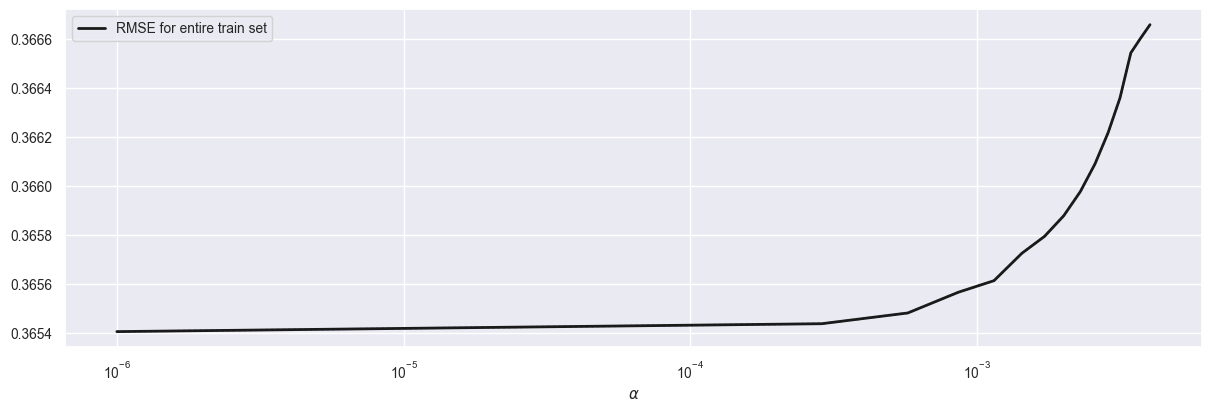

In [739]:

plt.figure(figsize=(12, 4), constrained_layout=True)
plt.semilogx(alpha_grid, rmse_list, ':')
plt.semilogx(alpha_grid, rmse_list, 'k',
             label='RMSE for entire train set', linewidth=2)
plt.legend()
plt.xlabel(r'$\alpha$')
plt.show(block=False)

In [740]:
print(min(rmse_list))
print(rmse_list)

0.3654038588757871
[0.3654038588757871, 0.3654361516907657, 0.36548005798535893, 0.3655646148973297, 0.3656121599306081, 0.36572376500626497, 0.3657930179670146, 0.3658771674440301, 0.36597594873610534, 0.36608915927897134, 0.3662167271400315, 0.3663585923570127, 0.3665428188856466, 0.36660389220220174, 0.3666581532577601]


The minimum is reached for the model including all covariate as anticipated. Because I'm not using any cross-validation setting, the smallest error goes with the more complex model. Yet the full model  could be complexified by adding interaction between variables, adding CODPOSS. I observe that sex, contrary to what was suggested from the p_value >5% in a previous GLM, is not converging to 0 easily and this seems to indicate that it should be kept. However sportc, fleetc are quickly going to 0, hence it seems reasonable to remove them. The results suggests that, ideally some categories could be merged such as age_car_0_1 with age_car_2_5, split_twice with split_thrice and others. 


### 3.5 RMSE on test set <a name="three-five"></a>

Let's recalibrate the model with these changes:

In [741]:
mtpl_train.coverp

117829    MTPL+++
112147    MTPL+++
137592      MTPL+
40087        MTPL
117624       MTPL
           ...   
79592     MTPL+++
54683     MTPL+++
37183        MTPL
99266       MTPL+
78282        MTPL
Name: coverp, Length: 114559, dtype: category
Categories (3, object): ['MTPL', 'MTPL+', 'MTPL+++']

In [742]:
freq_glm_3= smf.glm(formula='nclaims ~ sex + fuelc+ agecar + split + coverp + powerc + age_cat2',
                       data= mtpl_train, exposure = mtpl_train.expo,
                       family = sm.families.Poisson(link=sm.families.links.log())).fit()
print(freq_glm_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nclaims   No. Observations:               114559
Model:                            GLM   Df Residuals:                   114538
Model Family:                 Poisson   Df Model:                           20
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -44097.
Date:                Fri, 03 Feb 2023   Deviance:                       61711.
Time:                        19:14:59   Pearson chi2:                 1.34e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.01220
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [743]:
freq_glm_3.pvalues

Intercept                                           6.390460e-31
sex[T.Male]                                         1.581795e-01
fuelc[T.Petrol]                                     3.761409e-19
agecar[T.2-5]                                       1.325776e-11
agecar[T.6-10]                                      7.285045e-07
agecar[T.>10]                                       3.064638e-06
split[T.Once]                                       1.117266e-47
split[T.Thrice]                                     1.854619e-01
split[T.Twice]                                      2.988222e-11
coverp[T.MTPL+]                                     9.691921e-07
coverp[T.MTPL+++]                                   5.282373e-06
powerc[T.<66]                                       4.118239e-06
powerc[T.>110]                                      1.649374e-01
age_cat2[T.Interval(24.8, 32.6, closed='right')]    8.440809e-17
age_cat2[T.Interval(32.6, 40.4, closed='right')]    1.819525e-55
age_cat2[T.Interval(40.4,

In [744]:
print(rmse(mtpl_test.nclaims,freq_glm_0.predict(mtpl_test)))
print(rmse(mtpl_test.nclaims,freq_glm_1.predict(mtpl_test)))
print(rmse(mtpl_test.nclaims,freq_glm_2.predict(mtpl_test)))
print(rmse(mtpl_test.nclaims,freq_glm_3.predict(mtpl_test)))

0.3667022334983238
0.3667026388545497
0.36670224453429007
0.36669271087401517


From the RMSE on the test set, the retained model glm n°3 is the best performing, I recall its spec: is nclaims ~ sex + fuelc+ agecar + split + coverp + powerc + age_cat2. Clearly this model can be improved by the analysis of CODPOSS, improving the bins of the ages through CV among other work on the features. A proper cross validation setup needs to be done instead of the train/test setup here. 


Unfortunately, I haven't suceeded in setting up the CV setup with the GLM from statsmodel. I tried to use the package glum in order to have a GLM - Cross validation - Lasso setup but for technical reasons it would not run on my laptop.

# 4. Modelling the claim Severity <a name="four"></a>

In [745]:
mtpl_severity=mtpl[mtpl["amount"]>0]
mtpl_severity["log_severity"]= np.log(mtpl_severity["amount"])
agecat = pd.cut(mtpl_severity.age, bins = 10, include_lowest = True)
agecat= agecat.rename("age_cat")
mtpl_severity = pd.concat([mtpl_severity, agecat], axis = 1)
mtpl_severity.head(5)


,age,codposs,expo,lnexpo,nclaims,nbrtotan,amount,agecar,sex,fuelc,split,usec,fleetc,sportc,coverp,powerc,log_severity,age_cat
1,28,1000,0.046575,-3.066684,1,21.470588,155.974606,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,5.049693,"(25.4, 32.8]"
12,72,1050,1.000000,0.000000,1,1.000000,1426.379342,2-5,Female,Petrol,Once,Private,No,No,MTPL+++,66-110,7.262895,"(69.8, 77.2]"
15,28,1060,0.956164,-0.044825,2,2.091691,1576.354924,6-10,Female,Petrol,Twice,Private,No,No,MTPL,66-110,7.362870,"(25.4, 32.8]"
20,52,1070,0.452055,-0.793952,3,6.636364,8885.396345,6-10,Female,Petrol,Monthly,Private,No,Yes,MTPL,>110,9.092164,"(47.6, 55.0]"
22,56,1082,1.000000,0.000000,1,1.000000,619.733812,0-1,Female,Petrol,Once,Private,No,No,MTPL+,66-110,6.429290,"(55.0, 62.4]"


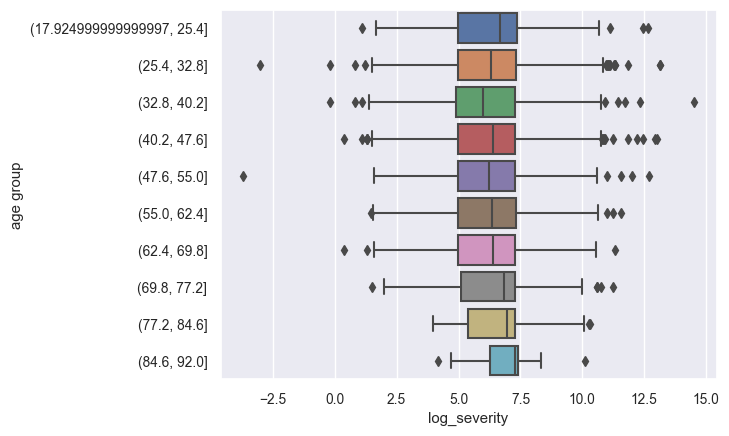

In [746]:
sns.boxplot(data = mtpl_severity, x = "log_severity", y =  "age_cat")
plt.ylabel("age group")
plt.show()

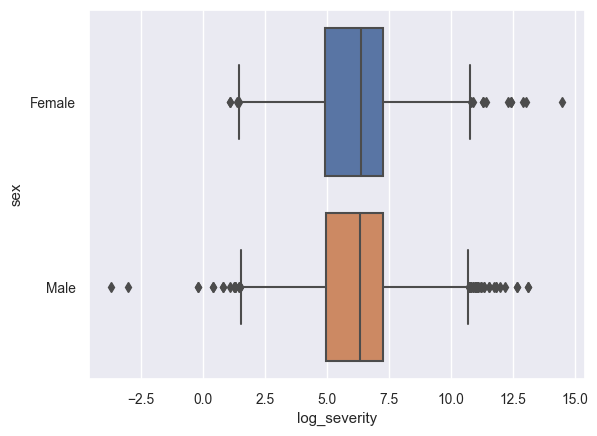

In [747]:
sns.boxplot(data = mtpl_severity, x = "log_severity", y =  "sex")
plt.ylabel("sex")
plt.show()

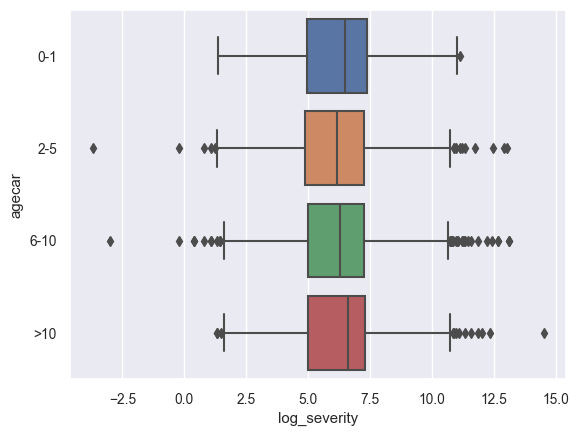

In [748]:
sns.boxplot(data = mtpl_severity, x = "log_severity", y =  "agecar")
plt.ylabel("agecar")
plt.show()

It turns out that the claim severity seems to be independent from the characteristics of the policyholder available. Nevertheless I try to fit a GLM with a Normal distribution and a log link function.

In [749]:
sev_glm_0= smf.glm(formula='amount ~ age + sex + agecar + fuelc + split + fleetc + sportc + coverp + powerc ',
                       data= mtpl_severity, exposure = mtpl_severity.expo,
                       family = sm.families.Gaussian(link=sm.families.links.log())).fit()
print(sev_glm_0.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 amount   No. Observations:                18345
Model:                            GLM   Df Residuals:                    18329
Model Family:                Gaussian   Df Model:                           15
Link Function:                    log   Scale:                      3.0609e+08
Method:                          IRLS   Log-Likelihood:            -2.0525e+05
Date:                Fri, 03 Feb 2023   Deviance:                   5.6103e+12
Time:                        19:15:02   Pearson chi2:                 5.61e+12
No. Iterations:                    47   Pseudo R-squ. (CS):           0.002129
Covariance Type:            nonrobust                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.4654      0.56

Despite the observation that the log severity behaved independently, I still observe some significant variables which may indicate that the model capture a little effect.

In [750]:
rmse(mtpl_severity.amount,sev_glm_0.fittedvalues)

17487.81691630144

Let's compare to the sample mean: 

In [751]:
mtpl_severity.amount.mean()

1794.0300767890942

In [752]:
prediction_sample_mean= np.full(mtpl_severity.amount.size,mtpl_severity.amount.mean())
rmse(mtpl_severity.amount,prediction_sample_mean)

17497.037787385547

I observe that the RMSE of the GLM and the simple sample mean is very close, this confirms that the severity is independant from the available covariates. Instead I fit a distribution for the log severity.

In [753]:
import scipy.stats as ss

(<Figure size 640x480 with 1 Axes>,)

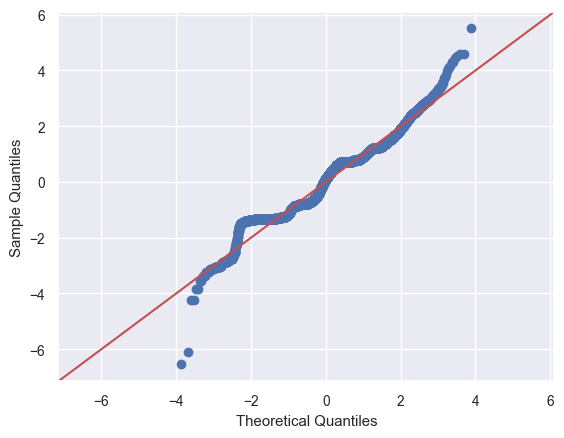

In [754]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(mtpl_severity[["log_severity"]])
mtpl_severity["log_severity_stand"]=scaler.transform(mtpl_severity[["log_severity"]])
sm.qqplot(mtpl_severity.log_severity_stand,line="45"),

In [755]:
print(ss.skew(mtpl_severity.log_severity))
print(ss.kurtosis(mtpl_severity.log_severity))

0.08042504830830526
-0.047499598475392535


From that QQ plot, the lognormal  distribition seems a reasonable fit for the severity, but a typical problem that may arise with this distribution is that the tail of the distribution may not be well captured. 

In [756]:
from fitter import Fitter, get_common_distributions, get_distributions

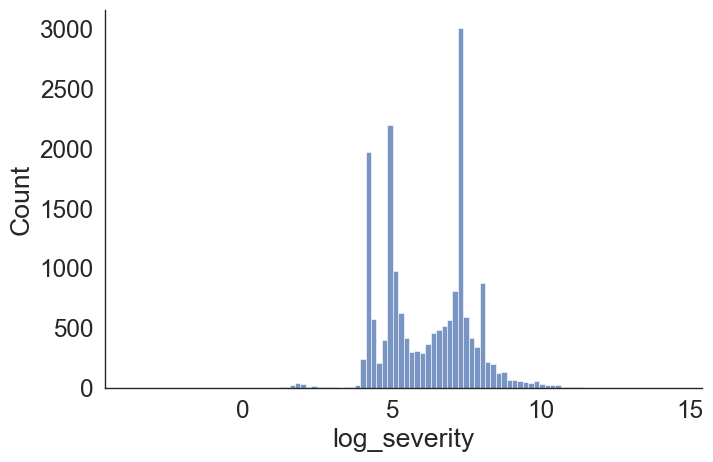

In [757]:
sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=mtpl_severity, x="log_severity", kind="hist", bins = 100, aspect = 1.5)

Fitting 5 distributions: 100%|██████████| 5/5 [00:02<00:00,  2.09it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
beta,1.163108,1620.291997,-177283.802639,inf,0.116458,3.195267e-217
norm,1.163396,1507.569319,-177298.898447,inf,0.114669,1.358279e-210
gamma,1.164713,1580.867190,-177268.331320,inf,0.117437,6.826141e-221
lognorm,1.164860,1577.355776,-177266.007646,inf,0.117502,3.891950e-221
burr,1.170373,1187.554704,-177169.581110,inf,0.137411,1.323545e-302


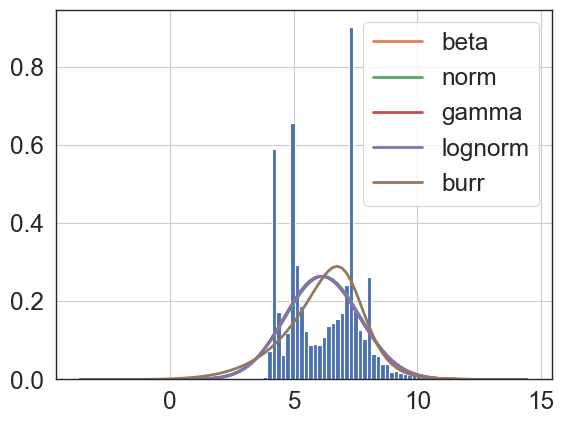

In [758]:
f = Fitter(mtpl_severity.log_severity,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()

In [759]:
f.fitted_param["norm"][0]

6.1886049714688

In [760]:
np.exp(f.fitted_param["norm"][0])

487.16602145654997

In [761]:
prediction_normal= np.full(mtpl_severity.amount.size,np.exp(f.fitted_param["norm"][0]))
rmse(mtpl_severity.amount,prediction_normal)

17545.775132273808

In [762]:
print(rmse(mtpl_severity.amount,sev_glm_0.fittedvalues))
print(rmse(mtpl_severity.amount,prediction_sample_mean))
print(rmse(mtpl_severity.amount,prediction_normal))

17487.81691630144
17497.037787385547
17545.775132273808


The mean severity fitted under the lognormal assumption for the severity is 487,2 but performs worse than just the sample mean severity with a RMSE of 17545.8. A better approach would be to fit a  splice distribution with a body and tail to capture the lower tail properly with a Erlang distribution in the lower tail and a Pareto distribution in the upper tail however it seems  not to have a package in Python.  For its simplicity and in this context I choose to use the sample mean as estimate of the mean severity of 1794.

Note: I have searched for a SpliceFitPareto R- like package in Python but it doesn't seem to exist yet. 

In [763]:
Severity=mtpl_severity.amount.mean()
print(Severity)

1794.0300767890942


 # 5. Pricer with risk profiles <a name="five"></a>

In [764]:
df = pd.DataFrame({'sex': ["Male"],"fuelc":["Gasoil"], "agecar":["2-5"], "split":["Once"], "coverp":["MTPL+"], "powerc":["66-110"], "age_cat2":["24-32"]})
df
Freq = freq_glm_4.predict(df)
Price=Freq*Severity
Price

0    277.902765
dtype: float64

In [765]:
df = pd.DataFrame({'sex': ["Female"],"fuelc":["Gasoil"], "agecar":["0-1"], "split":["Once"], "coverp":["MTPL+++"], "powerc":["66-110"], "age_cat2":["56_63"]})
df
Freq = freq_glm_4.predict(df)
Price=Freq*Severity
Price

0    304.993331
dtype: float64

The price for a 25 years old man driving a diesel 2 years old car 110cv with an annual premium payment and a MTPL+ policy is 278

The price for a 56 years old woman  driving a diesel 1 year old car 110cv with an annual premium payment and a MTPL+++ policy is 305